In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/first3/FinalData_First3.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import math
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline, FeatureUnion,make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.calibration import calibration_curve
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import sklearn.metrics
import warnings

# Feature estimation functions

In [3]:
def eye_aspect_ratio(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

def mouth_aspect_ratio(mouth):
    A = distance.euclidean(mouth[14], mouth[18])
    C = distance.euclidean(mouth[12], mouth[16])
    mar = (A ) / (C)
    return mar

def circularity(eye):
    A = distance.euclidean(eye[1], eye[4])
    radius  = A/2.0
    Area = math.pi * (radius ** 2)
    p = 0
    p += distance.euclidean(eye[0], eye[1])
    p += distance.euclidean(eye[1], eye[2])
    p += distance.euclidean(eye[2], eye[3])
    p += distance.euclidean(eye[3], eye[4])
    p += distance.euclidean(eye[4], eye[5])
    p += distance.euclidean(eye[5], eye[0])
    return 4 * math.pi * Area /(p**2)
    
def mouth_over_eye(eye):
    ear = eye_aspect_ratio(eye)
    mar = mouth_aspect_ratio(eye)
    mouth_eye = mar/ear
    return mouth_eye

def average(y_pred, window_size=2000):
    for i in range(len(y_pred)):
        if i < window_size or i >= len(y_pred) - window_size:
            pass
        else:
            average = float(sum(y_pred[i-window_size:i+window_size+1])) / (2*window_size+1)
            if average >= 0.5:
                y_pred[i] = 1
            else:
                y_pred[i] = 0
    return y_pred


# Load dataset

In [4]:
df = pd.read_csv(r'/kaggle/input/first3/FinalData_First3.csv')

In [5]:
df.head()

,EAR,MAR,CIR,MOE,EAR_N,MAR_N,CIR_N,MOE_N,State
0,0.376371,1.253342,0.650692,3.330069,-1.137820,0.137071,-0.571872,0.770337,0
1,0.405949,1.208933,0.758213,2.978043,1.296250,-1.287514,1.406080,-1.412269,0
2,0.388272,1.284932,0.636432,3.309359,-0.158430,1.150443,-0.834208,0.641932,0
3,0.354285,1.274304,0.613747,3.596831,-2.955369,0.809510,-1.251522,2.424296,0
4,0.356203,1.277650,0.604534,3.586857,-2.797551,0.916817,-1.421012,2.362458,0


# Exploratory Data Analysis

## Descriptive Statistics

In [6]:
df.describe()

,EAR,MAR,CIR,MOE,EAR_N,MAR_N,CIR_N,MOE_N,State
count,19681.000000,19681.000000,19681.000000,19681.000000,19681.000000,19681.000000,19681.000000,19681.000000,19681.000000
mean,0.292279,1.040864,0.602411,3.727154,-2.264692,3.124449,-4.627137,4.005877,0.496977
std,0.062456,0.188514,0.076974,1.076739,6.233996,16.537507,32.359309,17.146027,0.500004
min,0.077977,0.200033,0.305892,0.689280,-65.934185,-183.183547,-496.231940,-41.047401,0.000000
25%,0.250514,0.928047,0.550632,3.024561,-3.833681,-2.093121,-3.228850,-1.127188,0.000000
50%,0.297386,1.013727,0.605053,3.518939,-0.992183,0.334120,-0.831012,0.855727,0.000000
75%,0.338127,1.138272,0.656532,4.139437,0.792791,4.391722,0.854743,4.941849,1.000000
max,0.570214,3.997724,1.049081,13.438747,80.539640,268.091494,1136.150622,550.749585,1.000000


## Distribution of various features

### EAR

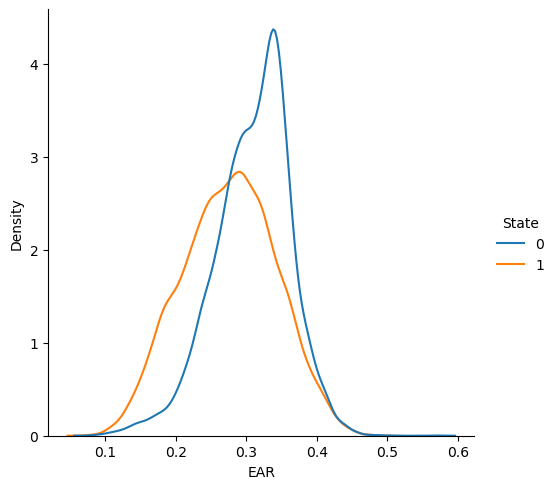

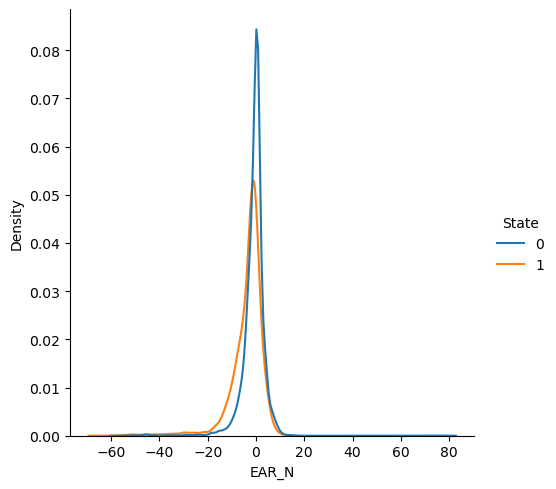

In [7]:
sns.displot(data = df, x = df['EAR'], kind ='kde', hue = 'State')
sns.displot(data = df, x = df['EAR_N'], kind ='kde', hue = 'State')

### MAR

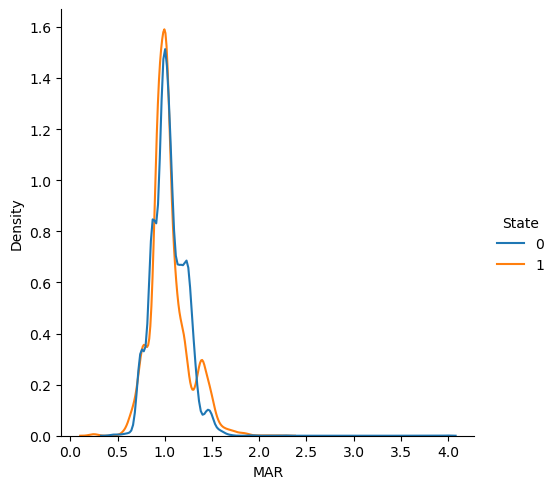

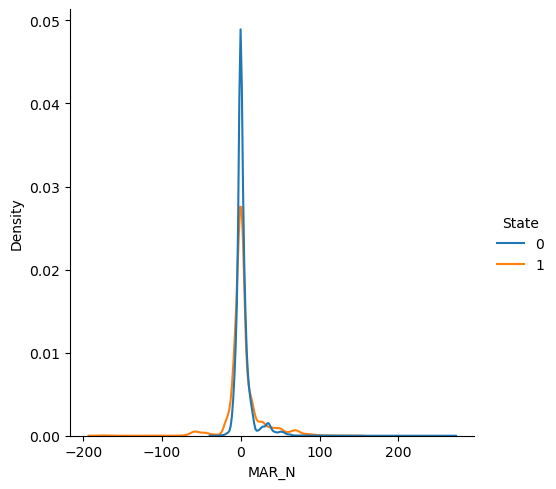

In [8]:
sns.displot(data = df, x = df['MAR'], kind ='kde', hue = 'State')
sns.displot(data = df, x = df['MAR_N'], kind ='kde', hue = 'State')

### MOE

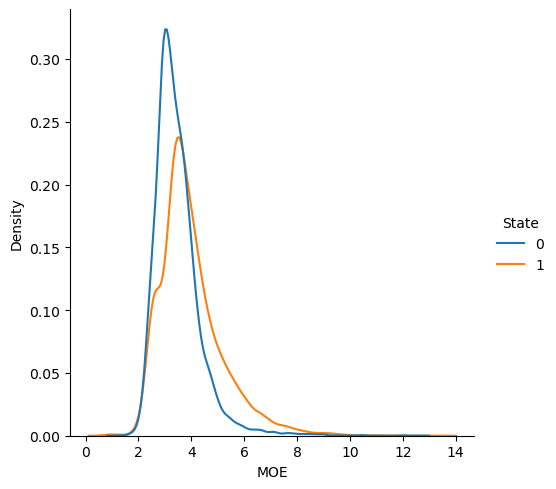

In [9]:
sns.displot(data = df, x = df['MOE'], kind ='kde', hue = 'State')

### CIR

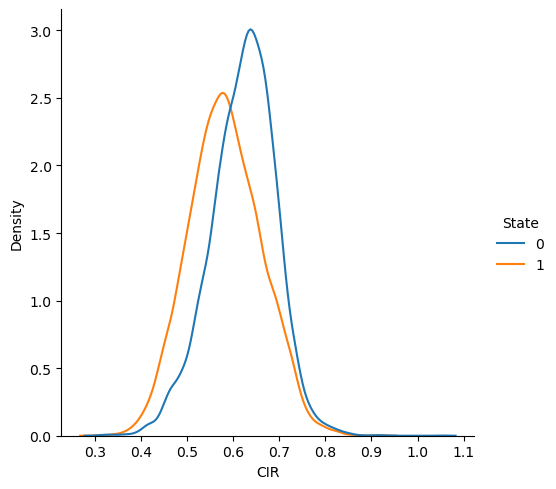

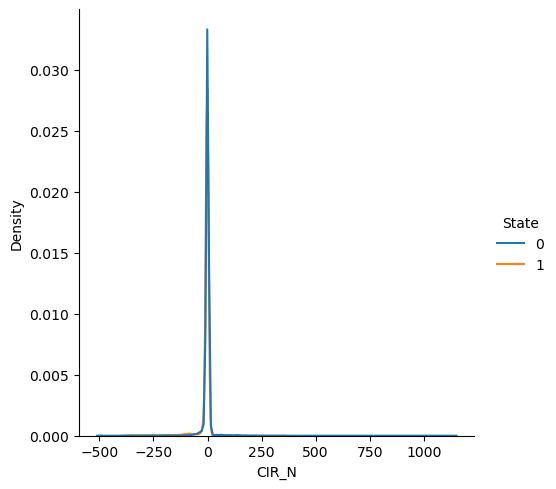

In [10]:
sns.displot(data = df, x = df['CIR'], kind ='kde', hue = 'State')
sns.displot(data = df, x = df['CIR_N'], kind ='kde', hue = 'State')

## P-Values of features

In [11]:
import statsmodels.api as sm
import pandas as pd

def print_feature_significance(x, y):
    """
    Prints the p-values of each feature in the input dataframe.
    
    Args:
    x (pandas.DataFrame): Input features
    y (pandas.Series): Target variable
    
    Returns:
    None
    """
    model = sm.OLS(y, x).fit()
   
    return pd.DataFrame(model.pvalues, columns=["p-value"])

In [12]:
def plot_pvalues(pvalues):
    plt.plot(pvalues)
    plt.axhline(y=0.05, color='r', linestyle='--')
    plt.yscale('log')
    plt.xlabel('Feature Index')
    plt.ylabel('P-value')
    plt.show()

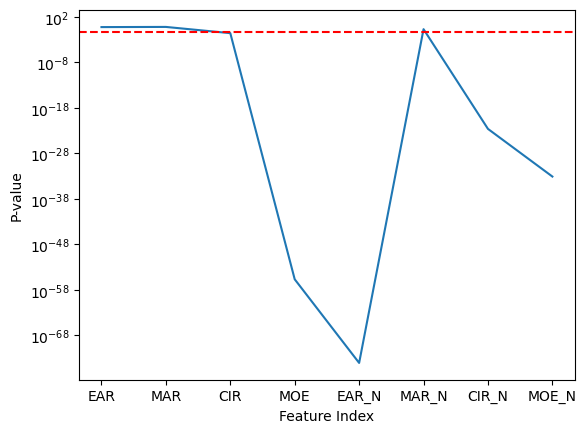

In [13]:
plot_pvalues(print_feature_significance(x = df.iloc[:,:-1], y = df.iloc[:, -1]))

## Feature Importance

In [14]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_feature_importance(x, y, n_estimators=100, random_state=42):
    """
    Calculates feature importance using random forest regressor.

    Args:
        x: pandas.DataFrame containing input features
        y: pandas.Series containing target variable
        n_estimators: number of decision trees to use in random forest (default: 100)
        random_state: random state seed (default: 42)

    Returns:
        pandas.DataFrame containing feature importances
    """

    # Fit random forest regressor
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    rf.fit(x, y)

    # Extract feature importances
    importances = rf.feature_importances_

    # Create dataframe of feature importances
    feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

    # Sort dataframe by importance
    feature_importances = feature_importances.sort_values('importance', ascending=False).reset_index(drop=True)

    return feature_importances


In [15]:
fi = random_forest_feature_importance(x = df.iloc[:,:-1], y = df.iloc[:,-1])

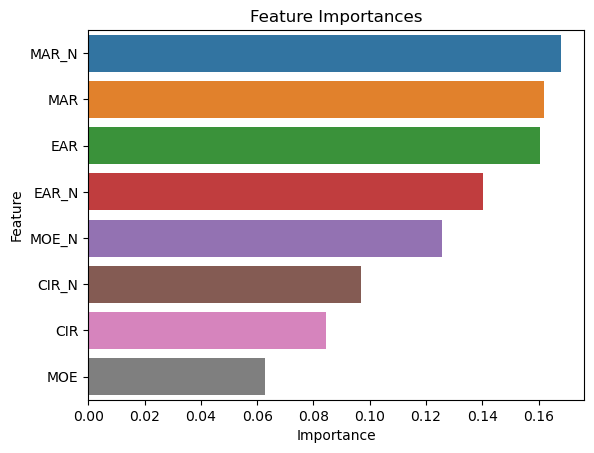

In [16]:
sns.barplot(x= fi['importance'], y=fi['feature'])
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Model Building

In [17]:
X = df.drop(['State'], axis = 1).copy()
y = df['State'].copy()

In [18]:
print(X.shape,y.shape)

(19681, 8) (19681,)


### Train-Test-Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.80,random_state = 0)

In [20]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(15744, 8) (3937, 8) (15744,) (3937,)


### Logistic Regression

accuracy: 0.6507, F1 score: 0.6261, ROC AUC: 0.6842
[[1411  637]
 [ 738 1151]]


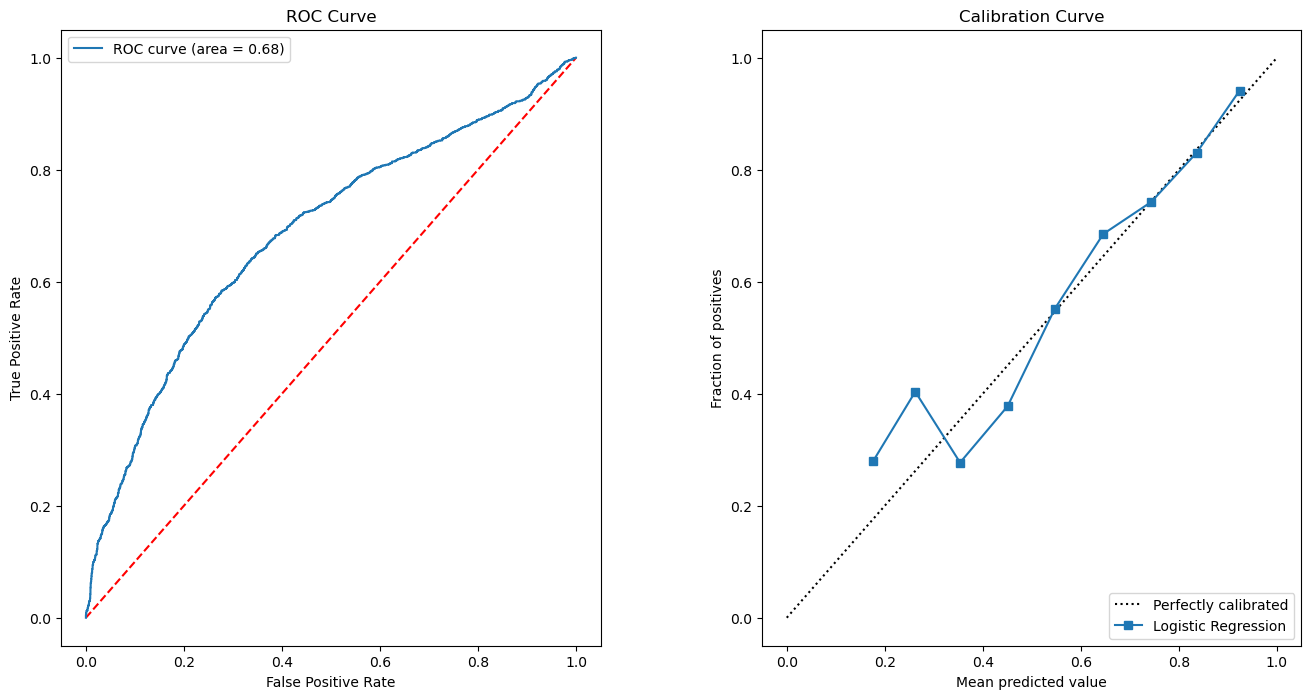

In [21]:
# Train and evaluate the logistic regression model
model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = average(y_pred)
y_prob_lg = model.predict_proba(X_test)[:, 1]

acc_lg = accuracy_score(y_test, y_pred)
f1_lg = f1_score(y_test, y_pred)
roc_auc_lg = roc_auc_score(y_test, y_prob_lg)

print(f"accuracy: {acc_lg:.4f}, F1 score: {f1_lg:.4f}, ROC AUC: {roc_auc_lg:.4f}")
print(confusion_matrix(y_test, y_pred))


# Plot the calibration curve
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob_lg, n_bins=10)

# Plot both curves side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
plt.subplots_adjust(wspace=0.3)

# Plot the ROC curve in the first subplot
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lg)
axs[0].plot([0, 1], [0, 1], 'r--')
axs[0].plot(fpr, tpr, label=f"ROC curve (area = {roc_auc_lg:.2f})")
axs[0].set_title('ROC Curve')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].legend()

# Plot the calibration curve in the second subplot
axs[1].plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
axs[1].plot(mean_predicted_value, fraction_of_positives, 's-', label='Logistic Regression')
axs[1].set_title('Calibration Curve')
axs[1].set_xlabel('Mean predicted value')
axs[1].set_ylabel('Fraction of positives')
axs[1].legend(loc='lower right')

plt.savefig('LogReg_ROC_Calibration.png', format='png')


### Naive Bayes

Accuracy: 0.6355, F1 score: 0.5047, ROC AUC: 0.7067
[[1771  277]
 [1158  731]]


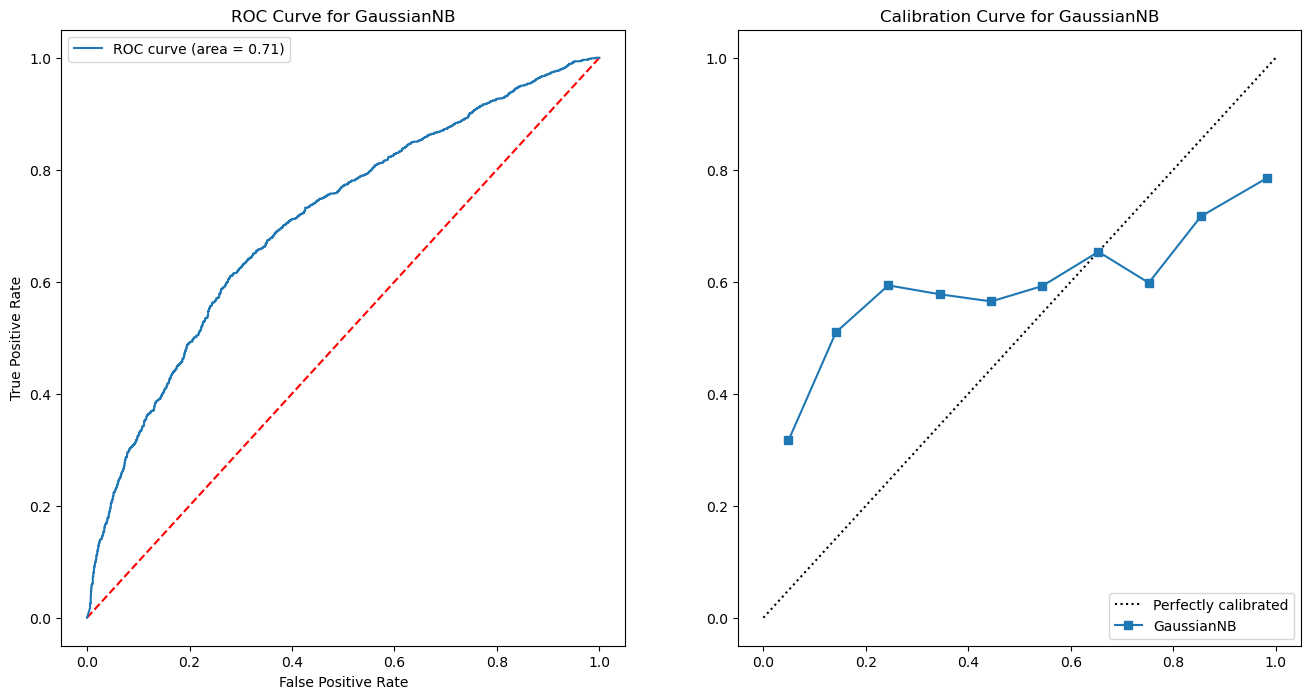

In [22]:
model = make_pipeline(StandardScaler(), GaussianNB())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred = average(y_pred)
y_prob_nb = model.predict_proba(X_test)[:, 1]

acc_nb = accuracy_score(y_test, y_pred)
f1_nb = f1_score(y_test, y_pred)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

print(f"Accuracy: {acc_nb:.4f}, F1 score: {f1_nb:.4f}, ROC AUC: {roc_auc_nb:.4f}")
print(confusion_matrix(y_test, y_pred))

# Plot the ROC curve
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'r--')
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nb)
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc_nb:.2f})")
plt.title('ROC Curve for GaussianNB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Plot the calibration curve
plt.subplot(1, 2, 2)
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_prob_nb, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='GaussianNB')
plt.legend(loc='lower right')
plt.title('Calibration Curve for GaussianNB')
plt.savefig('GaussianNB.png', format='png')


### K-Nearest Neighbours

In [23]:
from sklearn import metrics
acc_list_knn = []
f1_score3_list = []
roc_3_list = []

for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    pred_KN = neigh.predict(X_test)
    pred_KN = average(pred_KN)
    y_score_knn = neigh.predict_proba(X_test)[:,1]
    acc_list_knn.append(accuracy_score(y_test, pred_KN))
    f1_score3_list.append(metrics.f1_score(y_test, pred_KN))
    roc_3_list.append(metrics.roc_auc_score(y_test, y_score_knn))

neigh = KNeighborsClassifier(n_neighbors=acc_list_knn.index(max(acc_list_knn))+1)
neigh.fit(X_train, y_train)
pred_KN = neigh.predict(X_test)
pred_KN = average(pred_KN)
y_score_knn = neigh.predict_proba(X_test)[:,1]
acc_knn = accuracy_score(y_test, pred_KN)
f1_score_knn = metrics.f1_score(y_test, pred_KN)
roc_knn = metrics.roc_auc_score(y_test, y_score_knn)
print([acc_knn,f1_score_knn,roc_knn])
print(confusion_matrix(y_test, pred_KN))

[0.8110236220472441, 0.8070539419087137, 0.8779923705085364]
[[1637  411]
 [ 333 1556]]


Accuracy, F1-score, and ROC AUC score:
[0.8110236220472441, 0.8070539419087137, 0.8779923705085364]
Confusion matrix:
[[1637  411]
 [ 333 1556]]


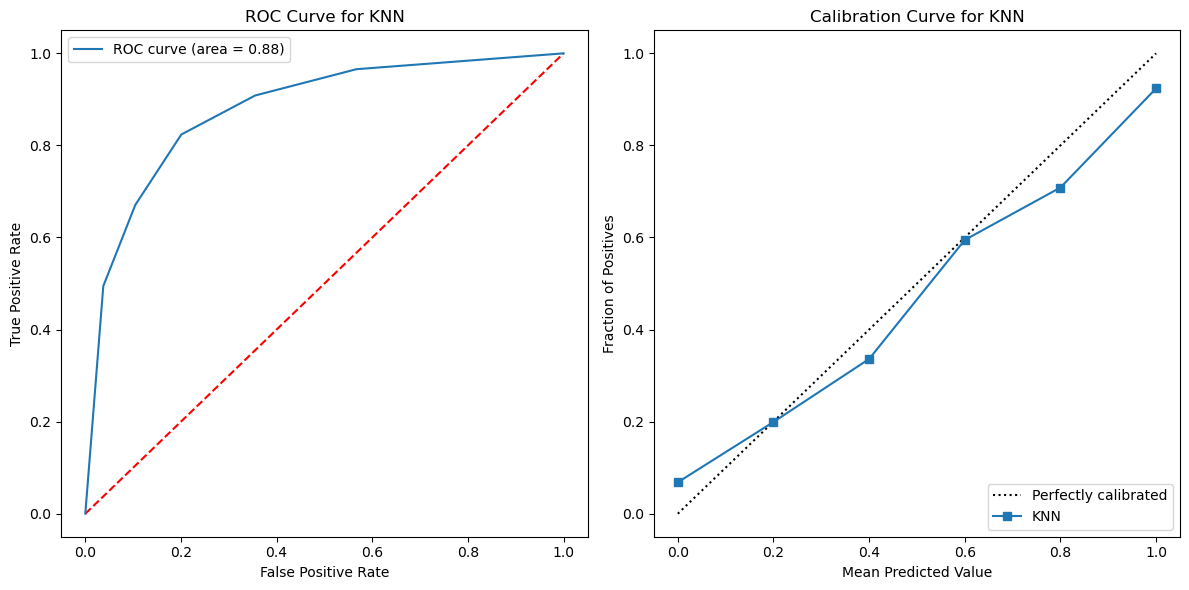

In [24]:
# Define the number of neighbors to use in the KNN model
n_neighbors = np.argmax(acc_list_knn) + 1

# Train the KNN model
neigh = KNeighborsClassifier(n_neighbors=n_neighbors)
neigh.fit(X_train, y_train)

# Make predictions on the test set and evaluate the model's performance
pred_KN = neigh.predict(X_test)
pred_KN = average(pred_KN)
y_score_knn = neigh.predict_proba(X_test)[:,1]

acc_knn = accuracy_score(y_test, pred_KN)
f1_score_knn = f1_score(y_test, pred_KN)
roc_knn = roc_auc_score(y_test, y_score_knn)

print("Accuracy, F1-score, and ROC AUC score:")
print([acc_knn, f1_score_knn, roc_knn])

print("Confusion matrix:")
print(confusion_matrix(y_test, pred_KN))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))

# Plot the ROC curve in the first subplot
ax1.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_test, y_score_knn)
ax1.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_knn)
ax1.set_title('ROC Curve for KNN')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend()

# Plot the calibration curve in the second subplot
ax2.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_score_knn, n_bins=10)
ax2.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % 'KNN')
ax2.legend(loc="lower right")
ax2.set_title('Calibration Curve for KNN')
ax2.set_xlabel('Mean Predicted Value')
ax2.set_ylabel('Fraction of Positives')

# Show the figure
plt.tight_layout()
plt.show()


### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Define the range of values to try for max_depth
max_depth_range = range(2, 11)

# Train Decision Tree models with different max_depth values and record the accuracy scores
accuracy_scores = []
for depth in max_depth_range:
    clf_DT = DecisionTreeClassifier(random_state=0, max_depth=depth)
    clf_DT.fit(X_train, y_train)
    pred_DT = clf_DT.predict(X_test)
    pred_DT = average(pred_DT)
    accuracy = accuracy_score(pred_DT, y_test)
    accuracy_scores.append(accuracy)

# Find the value of max_depth that gave the highest accuracy score
best_accuracy = max(accuracy_scores)
best_max_depth = max_depth_range[accuracy_scores.index(best_accuracy)]

print(f"Best accuracy: {best_accuracy:.4f} (max_depth={best_max_depth})")


Best accuracy: 0.7861 (max_depth=10)


Accuracy: 0.7861
F1 score: 0.7778
ROC AUC score: 0.8458
[[1621  427]
 [ 415 1474]]


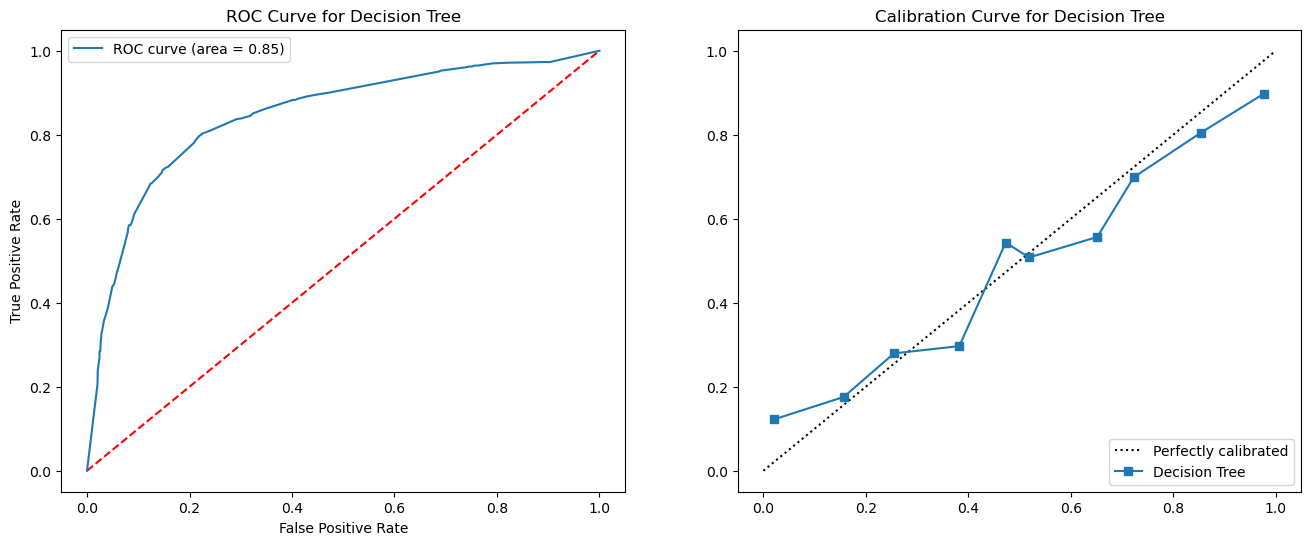

In [26]:
# Train a Decision Tree classifier with the best max_depth value
clf_DT = DecisionTreeClassifier(random_state=0, max_depth=best_max_depth)
clf_DT.fit(X_train, y_train)

# Predict on the test set and compute evaluation metrics
pred_DT = clf_DT.predict(X_test)
pred_DT = average(pred_DT)
y_score_dt = clf_DT.predict_proba(X_test)[:, 1]
acc_dt = accuracy_score(y_test, pred_DT)
f1_score_5 = metrics.f1_score(y_test, pred_DT)
roc_5 = metrics.roc_auc_score(y_test, y_score_dt)

# Print the evaluation metrics
print(f"Accuracy: {acc_dt:.4f}")
print(f"F1 score: {f1_score_5:.4f}")
print(f"ROC AUC score: {roc_5:.4f}")
print(confusion_matrix(y_test, pred_DT))

# Set up subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the ROC curve in the first subplot
axs[0].plot([0, 1], [0, 1], 'r--')
fpr, tpr, thresholds = roc_curve(y_test, y_score_dt)
axs[0].plot(fpr, tpr, label=f'ROC curve (area = {roc_5:.2f})')
axs[0].set_title('ROC Curve for Decision Tree')
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].legend()

# Plot the calibration curve in the second subplot
axs[1].plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_score_dt, n_bins=10)
axs[1].plot(mean_predicted_value, fraction_of_positives, 's-', label='Decision Tree')
axs[1].legend(loc='lower right')
axs[1].set_title('Calibration Curve for Decision Tree')

# Show the plot
plt.show()


### Random Forest

In [27]:
acc6 = []
max_depth = []

for i in range(1, 10):
    clf_RF = RandomForestClassifier(max_depth=i)
    clf_RF.fit(X_train, y_train)
    pred_RF = clf_RF.predict(X_test)
    pred_RF = average(pred_RF)
    acc = metrics.accuracy_score(y_test, pred_RF)
    acc6.append(acc)
    max_depth.append(i)

max_acc = max(acc6)
best_depth = max_depth[acc6.index(max_acc)]
print(f"Maximum accuracy score: {max_acc}")
print(f"Best max_depth: {best_depth}")

Maximum accuracy score: 0.8201676403352807
Best max_depth: 9


accuracy: 0.8221996443992888, F1 Score: 0.8091603053435114, ROC AUC Score: 0.9020117239197326
[[1753  295]
 [ 405 1484]]


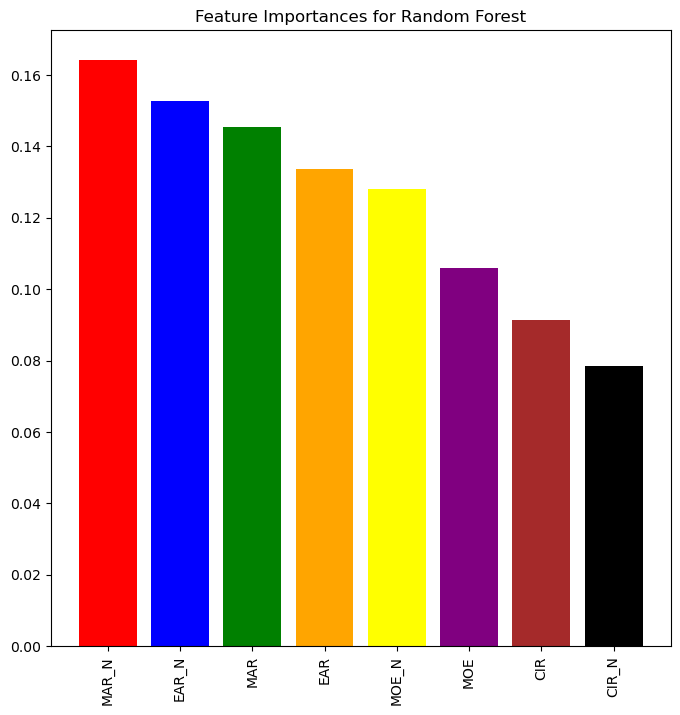

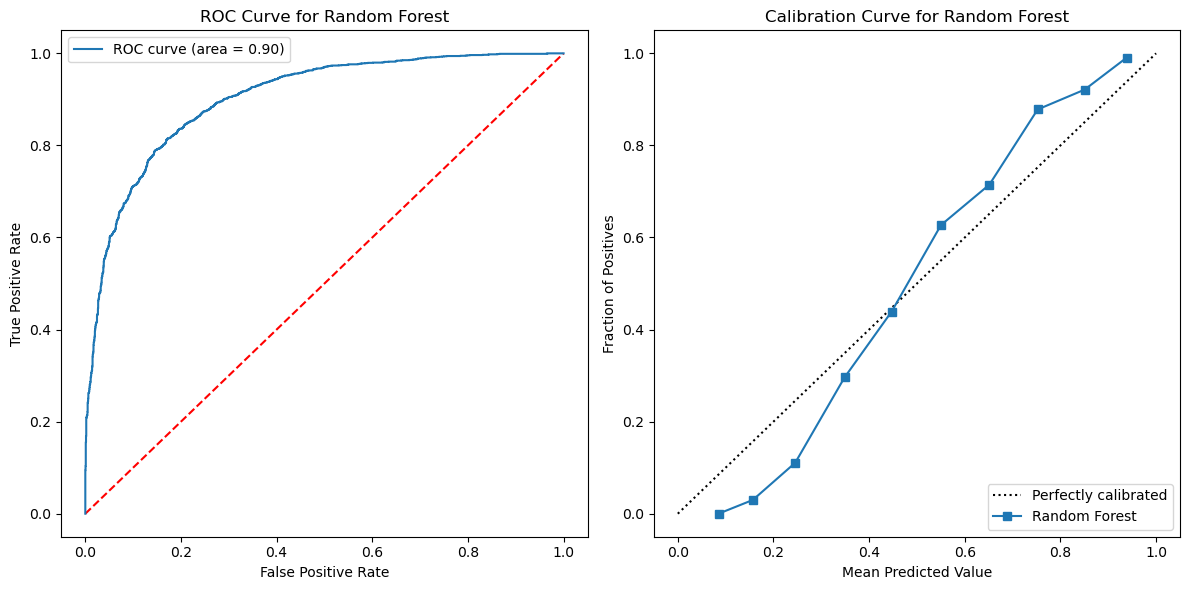

In [28]:
# Train a random forest classifier with the best depth
rf_classifier = RandomForestClassifier(max_depth=best_depth)
rf_classifier.fit(X_train, y_train)

# Make predictions and calculate performance metrics
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
y_score_rf = rf_classifier.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_score_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(f"accuracy: {accuracy_rf}, F1 Score: {f1_score_rf}, ROC AUC Score: {roc_auc_rf}")
print(confusion_matrix_rf)

# Calculate feature importances and plot them
feature_importances_rf = pd.DataFrame(rf_classifier.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(8, 8))
plt.bar(feature_importances_rf.index, feature_importances_rf['importance'], color = ['red','blue','green','orange','yellow','purple','brown','black'])
plt.xticks(rotation=90)
plt.title('Feature Importances for Random Forest')

# Plot ROC curve and calibration curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'r--')
fpr, tpr, thresholds = roc_curve(y_test, y_score_rf)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.title('ROC Curve for Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_score_rf, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % 'Random Forest')
plt.legend(loc="lower right")
plt.title('Calibration Curve for Random Forest')
plt.xlabel('Mean Predicted Value')
plt.ylabel('Fraction of Positives')

plt.tight_layout()
plt.show()


In [29]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D
from keras.optimizers import Adam
from keras.layers import Dropout
X_test_shaped = np.expand_dims(X_test, axis=2)
X_train_shaped = np.expand_dims(X_train, axis=2)

## Split Data into Training, Validation and Test Sets ##
X_train, X_val, y_train, y_val = train_test_split(X_train_shaped, y_train, test_size=0.2, random_state=42)

## Model Architecture ##
model = Sequential()

model.add(Conv1D(64, kernel_size=3, activation='relu', input_shape=(8, 1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

## Compile Model ##
optimizer = Adam(learning_rate=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## Train Model and Check Validation accuracy ##
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)


Epoch 1/100
394/394 [==============================] - 1s 2ms/step - loss: 0.7233 - accuracy: 0.5793 - val_loss: 0.6822 - val_accuracy: 0.6151
Epoch 2/100
394/394 [==============================] - 1s 2ms/step - loss: 0.6835 - accuracy: 0.5940 - val_loss: 0.6585 - val_accuracy: 0.6281
Epoch 3/100
394/394 [==============================] - 1s 2ms/step - loss: 0.6670 - accuracy: 0.6157 - val_loss: 0.6438 - val_accuracy: 0.6294
Epoch 4/100
394/394 [==============================] - 1s 2ms/step - loss: 0.6566 - accuracy: 0.6136 - val_loss: 0.6360 - val_accuracy: 0.6304
Epoch 5/100
394/394 [==============================] - 1s 2ms/step - loss: 0.6525 - accuracy: 0.6192 - val_loss: 0.6334 - val_accuracy: 0.6345
Epoch 6/100
394/394 [==============================] - 1s 2ms/step - loss: 0.6475 - accuracy: 0.6259 - val_loss: 0.6306 - val_accuracy: 0.6319
Epoch 7/100
394/394 [==============================] - 1s 2ms/step - loss: 0.6451 - accuracy: 0.6202 - val_loss: 0.6270 - val_accuracy: 0.6364

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             256       
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 32)                12320     
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13,121
Trainable params: 13,121
Non-traina

124/124 [==============================] - 0s 862us/step
[0.7233934467868935, 0.6903611032129656, 0.7880094254565908]
[[1634  414]
 [ 675 1214]]


Text(0.5, 1.0, 'Calibration Curve for CNN')

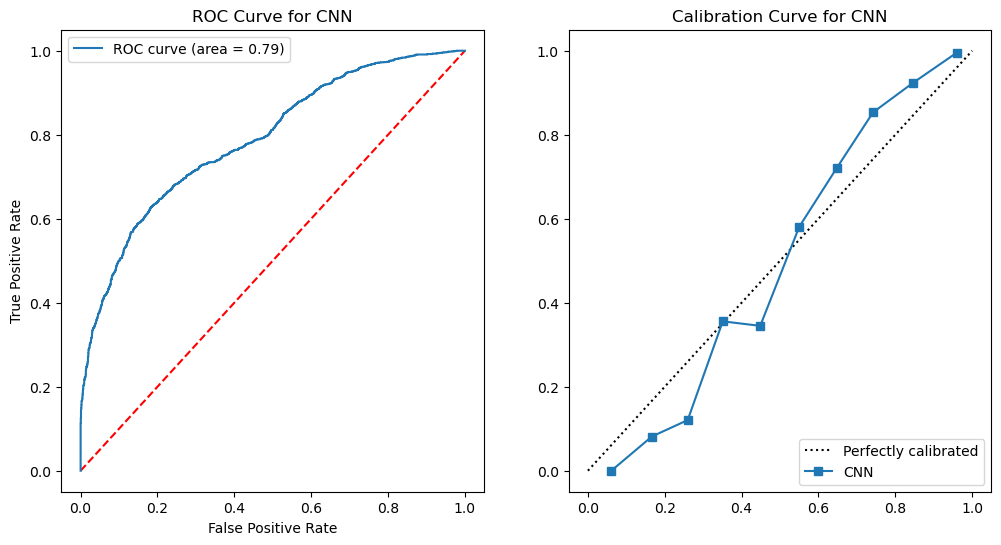

In [31]:
# Train and evaluate the CNN model
y_pred_cnn = model.predict(X_test_shaped)
y_pred_cnn_binary = np.where(y_pred_cnn >= 0.5, 1, 0)
y_pred_cnn_binary = average(y_pred_cnn_binary)
acc_cnn = accuracy_score(y_test, y_pred_cnn_binary)
f1_cnn = f1_score(y_test, y_pred_cnn_binary)
roc_cnn = roc_auc_score(y_test, y_pred_cnn)
print([acc_cnn, f1_cnn, roc_cnn])
print(confusion_matrix(y_test, y_pred_cnn_binary))

# Plot ROC curve
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot([0, 1], [0, 1], 'r--')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cnn)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_cnn)
plt.title('ROC Curve for CNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Plot calibration curve
plt.subplot(1, 2, 2)
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_cnn, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % 'CNN')
plt.legend(loc="lower right")
plt.title('Calibration Curve for CNN')

# Model Evaluation

## Model Accuracy

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

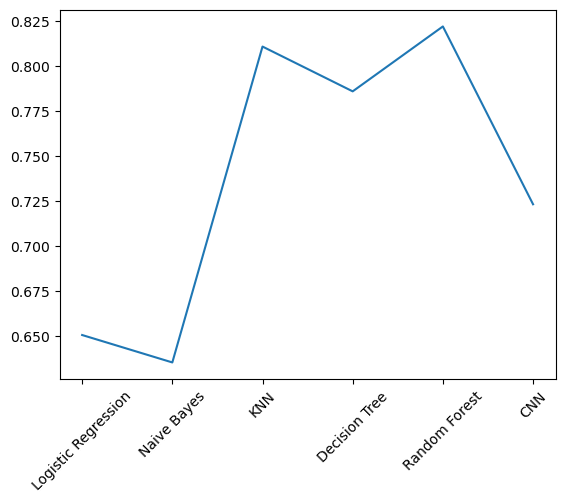

In [32]:
acc_total = {'Model':['Logistic Regression','Naive Bayes', 'KNN','Decision Tree','Random Forest', 'CNN'],
        'Accuracy':[acc_lg,acc_nb, acc_knn, acc_dt, accuracy_rf, acc_cnn]}
acc_total=pd.DataFrame(acc_total)
acc_total=acc_total.set_index('Model')
acc_total
plt.plot(acc_total['Accuracy'])
plt.xticks(rotation=45)

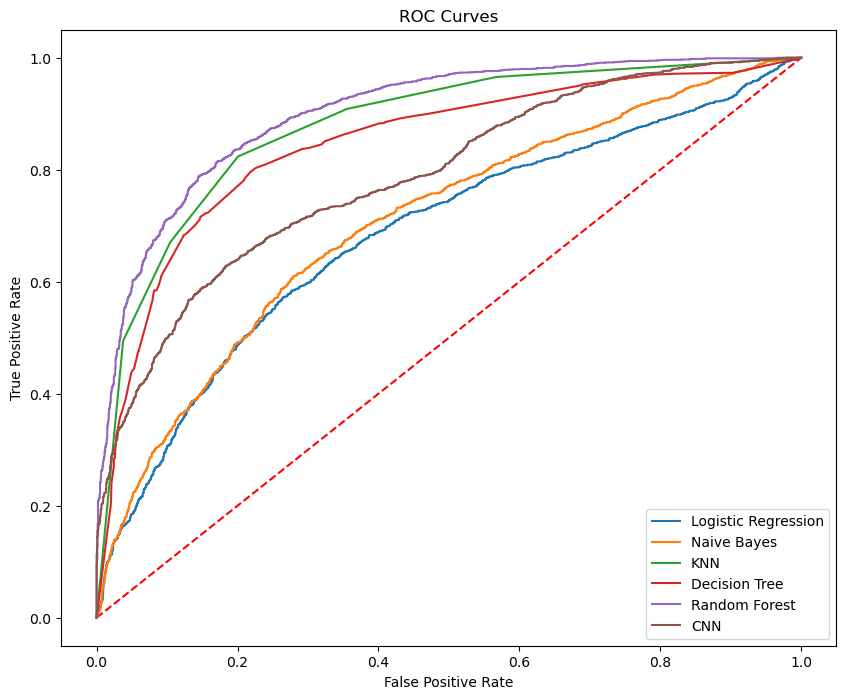

In [33]:
plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1],'r--')
fpr_1, tpr_1, thresholds = roc_curve(y_test, y_prob_lg)
fpr_2, tpr_2, thresholds = roc_curve(y_test, y_prob_nb)
fpr_3, tpr_3, thresholds = roc_curve(y_test, y_score_knn)
#fpr_4, tpr_4, thresholds = roc_curve(y_test, y_score_4)
fpr_5, tpr_5, thresholds = roc_curve(y_test, y_score_dt)
fpr_6, tpr_6, thresholds = roc_curve(y_test, y_score_rf)
fpr_7, tpr_7, thresholds = roc_curve(y_test, y_pred_cnn)
plt.plot(fpr_1, tpr_1, label= "Logistic Regression")
plt.plot(fpr_2, tpr_2, label= "Naive Bayes")
plt.plot(fpr_3, tpr_3, label= "KNN")
#plt.plot(fpr_4, tpr_4, label= "MLP")
plt.plot(fpr_5, tpr_5, label= "Decision Tree")
plt.plot(fpr_6, tpr_6, label= "Random Forest")
plt.plot(fpr_7, tpr_7, label= "CNN")
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

Text(0.5, 1.0, 'Calibration Curves')

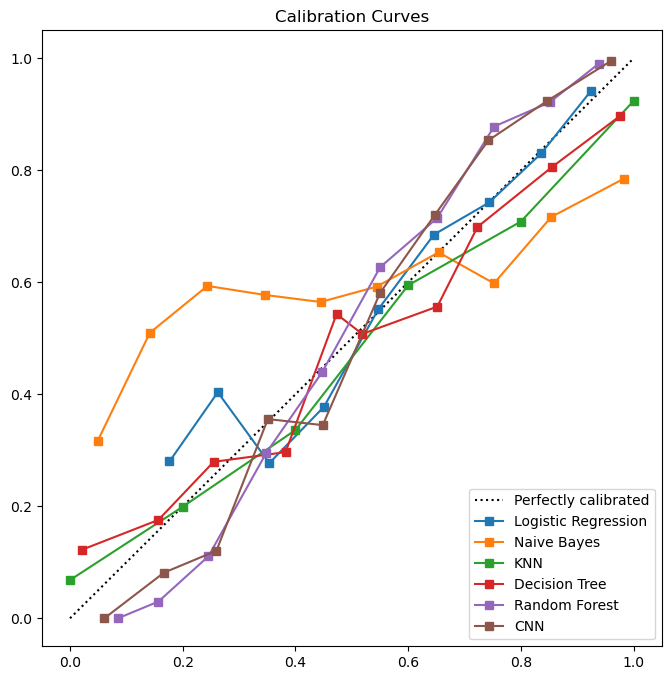

In [34]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_test, y_prob_lg, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Logistic Regression')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test, y_prob_nb, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Naive Bayes')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test, y_score_knn, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'KNN')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test, y_score_dt, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Decision Tree')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test, y_score_rf, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'Random Forest')
fraction_of_positives, mean_predicted_value=calibration_curve(y_test, y_pred_cnn, n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'CNN')
plt.legend(loc="lower right")
plt.title('Calibration Curves')